In [1]:
library(ggpubr)
library(ggrepel)
library(ggplotify)
library(pheatmap)
library(stringr)
library(dendsort)
library(patchwork)
library(tidyverse)
library(readxl)
theme_set(theme_pubr(base_size = 10))

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
gene_id_to_name <- read.table("../data/gene_id_to_name/gene_id_to_name_comprehensive.tsv", sep="\t", header=T, row.names=1, stringsAsFactors = F)

In [3]:
te.down.df <- read_xlsx("../data//Feb_2021_Kadosh_C_albicans_Biofilm_Planktonic_merged_TE_withprop (3) with TE and DE sets.xlsx",
                     sheet = "TE>=2-fold down")
te.up.df <- read_xlsx("../data//Feb_2021_Kadosh_C_albicans_Biofilm_Planktonic_merged_TE_withprop (3) with TE and DE sets.xlsx",
                     sheet = "TE >=2-fold up")
de.down.df <- read_xlsx("../data//Feb_2021_Kadosh_C_albicans_Biofilm_Planktonic_merged_TE_withprop (3) with TE and DE sets.xlsx",
                     sheet = "DE>=2-fold down")
de.up.df <- read_xlsx("../data//Feb_2021_Kadosh_C_albicans_Biofilm_Planktonic_merged_TE_withprop (3) with TE and DE sets.xlsx",
                     sheet = "DE>=2-fold up")


te.down.genes <- gene_id_to_name[te.down.df$gene_id, "gene_name"]
te.up.genes <- gene_id_to_name[te.up.df$gene_id, "gene_name"]
de.down.genes <- gene_id_to_name[de.down.df$gene_id, "gene_name"]
de.up.genes <- gene_id_to_name[de.up.df$gene_id, "gene_name"]

In [4]:
dim(te.down.df)

[1] 134  97

In [5]:
length(te.down.genes[!is.na(te.down.genes)])

[1] 134

In [6]:
te.down.genes

[1] "C3_02580C" "C2_00810C" "CR_06060W" "CRZ2"      "C4_00810C" "C2_07860W"
  [7] "C4_03190W" "C4_04010W" "C1_01190C" "C4_00030C" "C1_05610W" "RAM2"     
 [13] "C1_03050W" "C2_09510C" "C3_01140W" "C3_01590W" "CR_01360W" "C1_00320W"
 [19] "CR_04850C" "C1_13790C" "CR_01770C" "C4_05340W" "C3_04420W" "MRS2"     
 [25] "MLH1"      "C1_02720W" "C1_06440C" "C1_01800W" "RPA34"     "C1_12740W"
 [31] "HGT16"     "EST1"      "C1_10420C" "C6_00340C" "C4_03750C" "C1_04700C"
 [37] "CR_08450C" "CR_09660W" "C4_01670C" "CR_08710W" "TRS33"     "MNN10"    
 [43] "IRE1"      "C1_01160C" "C4_01660W" "CR_06090W" "C3_00450C" "C3_03250W"
 [49] "BRE1"      "C4_00390W" "SEC10"     "PEP1"      "RTT101"    "C2_02520W"
 [55] "NPR2"      "C2_04870C" "C1_10970W" "RPO21"     "BLM3"      "PTP1"     
 [61] "RIA1"      "POL2"      "MON2"      "HXK1"      "C3_05410W" "RRP15"    
 [67] "CR_08300C" "HRK1"      "C1_03450C" "FAL1"      "MSH6"      "CSC25"    
 [73] "LRO1"      "C4_01860C" "RDH54"     "CR_06470W" "C2_02720W" "C1_10680C"
 [79] "TPK2"      "HOL4"      "ORC3"      "IFH1"      "CR_08650C" "GLT1"     
 [85] "C2_08180C" "C6_04650W" "C3_03150W" "FLC2"      "YOR1"      "CR_07920W"
 [91] "MDL2"      "TRK1"      "YBP1"      "CTA3"      "C7_00940W" "CHO2"     
 [97] "C4_03110W" "C4_01790W" "VPS33"     "CWH43"     "ALS1"      "SDA1"     
[103] "PLD1"      "C1_02040C" "C2_08450W" "C1_01460W" "ADP1"      "URA2"     
[109] "C2_02180W" "COB"       "CNH1"      "YCF1"      "SKI3"      "RTG3"     
[115] "MTR10"     "C2_09100C" "FRE7"      "C1_08180C" "FAS1"      "CYR1"     
[121] "HIP1"      "C1_03360W" "RPO41"     "CHS3"      "GAP6"      "ADE6"     
[127] "SSK2"      "SEC7"      "ACC1"      "C4_07060W" "PMT1"      "C1_09340C"
[133] "HMG1"      "NCR1"

In [7]:
all.genes.df <- read_xlsx("../data//Feb_2021_Kadosh_C_albicans_Biofilm_Planktonic_merged_TE_withprop (3) with TE and DE sets.xlsx",
                     sheet = "Original Dataset")
universe <- all.genes.df[all.genes.df$prop_tpm_above_1_planktonic_rna_annotated>=0.33 |  all.genes.df$prop_tpm_above_1_biofilm_rna_annotated>=0.33,]
universe.genes <- gene_id_to_name[universe$gene_id, "gene_name"]


In [8]:
te.results <- read.table("../notebook_results/riborex/translation_efficiency_annotated.tsv", sep = "\t", stringsAsFactors = F)

te.results$status <- "NS"
te.results$pvalue[is.na(te.results$pvalue)] <- 100
te.results$status[(te.results$log2FoldChange>0) &  (te.results$pvalue<= 0.05)] <- "increased TE"
te.results$status[(te.results$log2FoldChange<0) &  (te.results$pvalue<= 0.05)] <- "reduced TE"

te.results$pvalue[te.results$pvalue>1] <- NA

rownames(te.results) <- gene_id_to_name[rownames(te.results), "gene_name"]

te.results <- te.results[intersect(rownames(te.results), universe.genes),]

In [9]:
te.down.genes.highlight <- c("CRZ2", "RAM2", "MRS2", "MLH1", "EST1", "MNN10", "IRE1")
te.up.genes.highlight <- c("RBR2", "THI6", "LYP1", "DAP1", "PGA18", "SOD1", "POP2")

In [10]:
keyvals <- ifelse(
    te.results$status == "reduced TE", '#006d2c',
      ifelse(te.results$status == "increased TE", '#de2d26',
        'grey50'))
names(keyvals)[keyvals == '#006d2c'] <- 'reduced TE'
names(keyvals)[keyvals == '#de2d26'] <- 'increased TE'
names(keyvals)[keyvals == 'grey50'] <- 'NS'

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


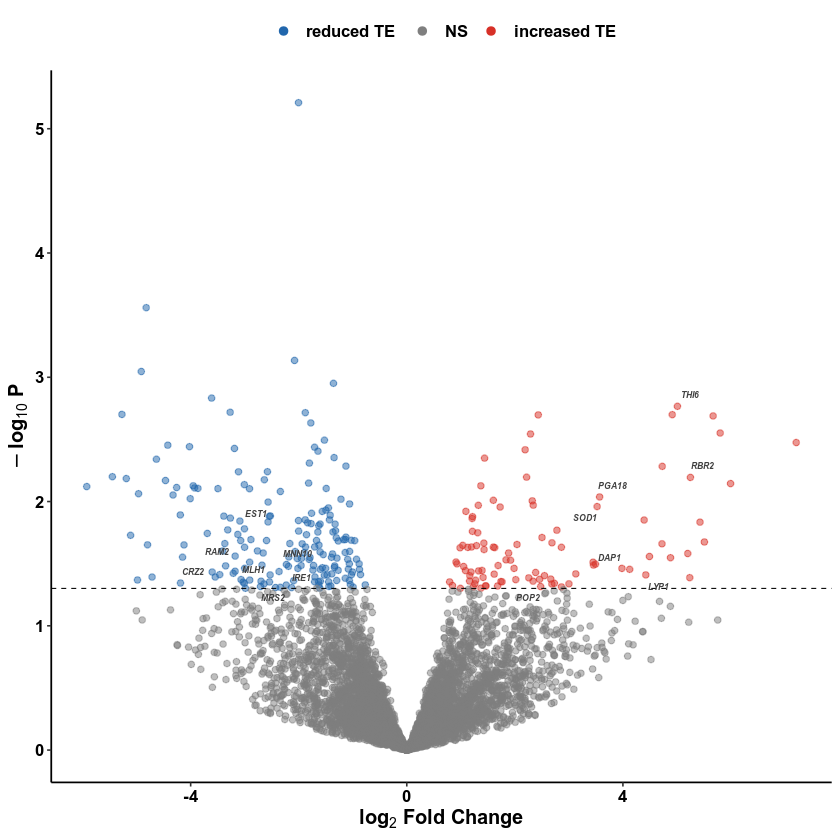

In [11]:
te.results$gene <- rownames(te.results)
te.results$status <- factor(te.results$status, levels = c("reduced TE", "NS", "increased TE"))
subset_df <- te.results[c(te.down.genes.highlight, te.up.genes.highlight),]

p1 <- ggplot(te.results[!is.na(te.results$pvalue),], aes(log2FoldChange, -log10(pvalue), color=status)) +
    geom_point(alpha=0.5) + 
    geom_hline(yintercept = -log10(0.05), color = "black", size = 0.3, linetype = "dashed") +
scale_color_manual(values = c("#2166ac", "grey50", "#d73027"), name="") +
    geom_text_repel(
      data = subset_df, 
        aes(label = gene), color = "gray25",
    segment.size=0, fontface="bold.italic", max.overlaps = Inf, size=1.8, min.segment.length = 10
    )  + 
xlab(expression(bold(paste(log[2], " Fold Change")))) + ylab(expression(bold(paste(-log[10], " P")))) +
        theme(axis.text=element_text(size=10, face="bold"),
        axis.title=element_text(size=12,face="bold"),
             legend.text = element_text(size=10, 
                                     face="bold")) + 
guides(colour = guide_legend(override.aes = list(alpha = 1, size=2))) #+ theme(legend.position = "right", legend.direction = "vertical")
  p1

In [12]:
de.down.genes.highlight <- c("SHA3", "CDR2", "NRM1", "CLB2", "TAC1", "CSA2", "IQG1")
de.up.genes.highlight <- c("GAP2", "PGA45", "CAN1", "STP1", "ICL1", "NCE103", "CEM1")

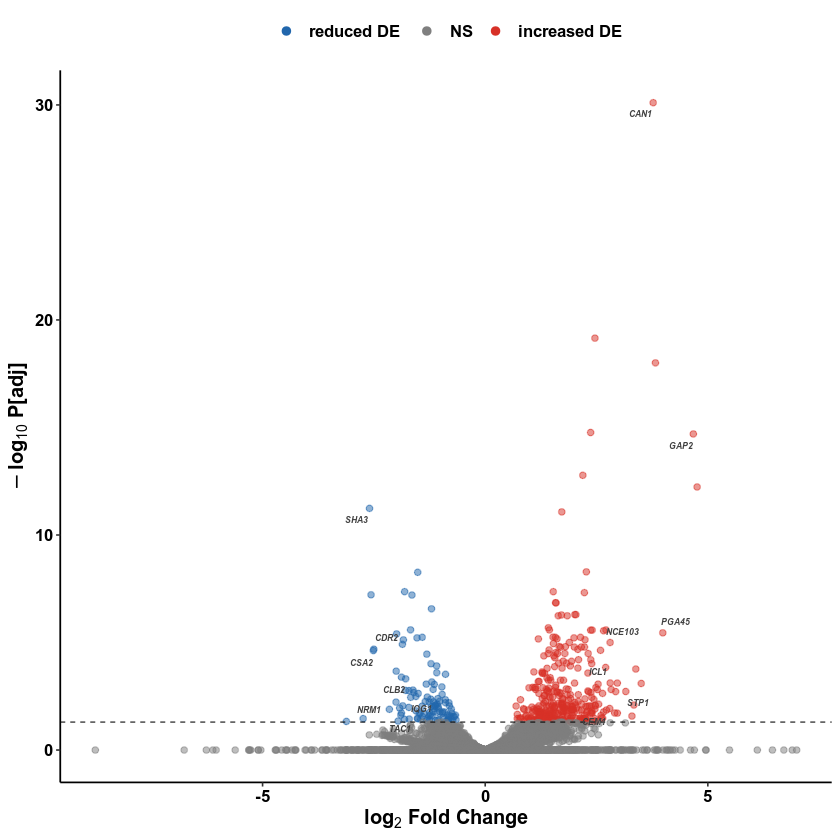

In [21]:
de.results <- read.table("../notebook_results/deseq2/rna_biofilm_vs_planktonic_annotated/rna_biofilm_vs_planktonic_annotated.tsv", sep = "\t", stringsAsFactors = F)


de.results$status <- "NS"
de.results$pvalue[is.na(de.results$pvalue)] <- 1
de.results$padj[is.na(de.results$padj)] <- 1

de.results$status[(de.results$log2FoldChange < 0) & (de.results$padj <0.05)] <- "reduced DE"
de.results$status[(de.results$log2FoldChange > 0) & (de.results$padj <0.05)] <- "increased DE"

rownames(de.results) <- gene_id_to_name[rownames(de.results), "gene_name"]

de.results <- de.results[intersect(rownames(de.results), universe.genes),]
de.results$status <- factor(de.results$status, levels = c("reduced DE", "NS", "increased DE"))
de.results$gene <- rownames(de.results)
subset_df <- de.results[c(de.down.genes.highlight, de.up.genes.highlight),]
p2 <- ggplot(de.results[!is.na(de.results$pvalue),], aes(log2FoldChange, -log10(padj), color=status)) +
    geom_point(alpha=0.5) + 
    geom_hline(yintercept = -log10(0.05), color = "black", size = 0.3, linetype = "dashed") +
#    geom_vline(xintercept = -1, color = "black", size = 0.3, linetype = "dashed") +

    scale_color_manual(values = c("#2166ac", "grey50", "#d73027"), name="") +
    geom_text_repel(
      data = subset_df, 
        aes(label = gene), color = "gray25",
    segment.size=0, fontface="bold.italic", max.overlaps = Inf, size = 1.8, min.segment.length = 10)  + 
xlab(expression(bold(paste(log[2], " Fold Change")))) + ylab(expression(bold(paste(-log[10], " P[adj]")))) +
        theme(axis.text=element_text(size=10, face="bold"),
        axis.title=element_text(size=12,face="bold"),
             legend.text = element_text(size=10, 
                                     face="bold")) + guides(colour = guide_legend(override.aes = list(alpha = 1, size=2)))

  p2

In [14]:
all.genes.df$lo

Warning message:
“Unknown or uninitialised column: `lo`.”


NULL

In [15]:
te.genes.list = c(te.up.genes, te.down.genes)
te.list <- c(te.up.df$gene_id, te.down.df$gene_id)
rownames(all.genes.df) <- all.genes.df$gene_id

shortlist_df <- all.genes.df[te.list, c('log2FC_TE_annotated_biofilm_vs_planktonic', 
                                         'log2FC_DEribo_annotated_biofilm_vs_planktonic', 
                                         'log2FC_DErna_annotated_biofilm_vs_planktonic')]
colnames(shortlist_df) <- c('TE', 'DE-Ribo', 'DE-RNA')

Warning message:
“Setting row names on a tibble is deprecated.”


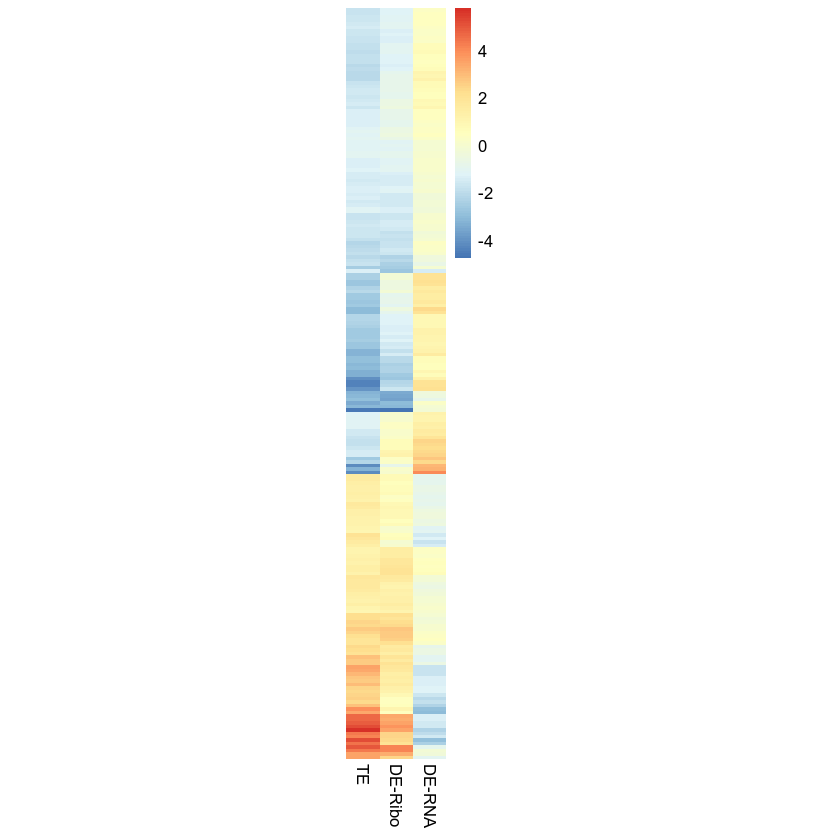

In [16]:
te.deribo.derna <- shortlist_df
mat <- te.deribo.derna
sort_hclust <- function(...) as.hclust(dendsort(as.dendrogram(...)))
mat_cluster_cols <- sort_hclust(hclust(dist(t(te.deribo.derna))))
mat_cluster_rows <- sort_hclust(hclust(dist(te.deribo.derna)))

p3 <- pheatmap(
  mat               = mat,
  border_color      = NA,
  cluster_cols      = mat_cluster_cols,
  cluster_rows      = mat_cluster_rows,
  cellwidth         = 20,
  show_colnames     = TRUE,
  show_rownames     = FALSE,
  #annotation_col    = mat_col,
  #annotation_colors = mat_colors,
  drop_levels       = TRUE,
  fontsize          = 10,
 #   fontface = "bold",
  #filename         = file.path('../plots/02.Differential_TE/TE_DE_genes_heatmap.pdf') 
  treeheight_row = 0, treeheight_col = 0
  #main              = "TE genes"
)
p3 <- as.ggplot(p3)

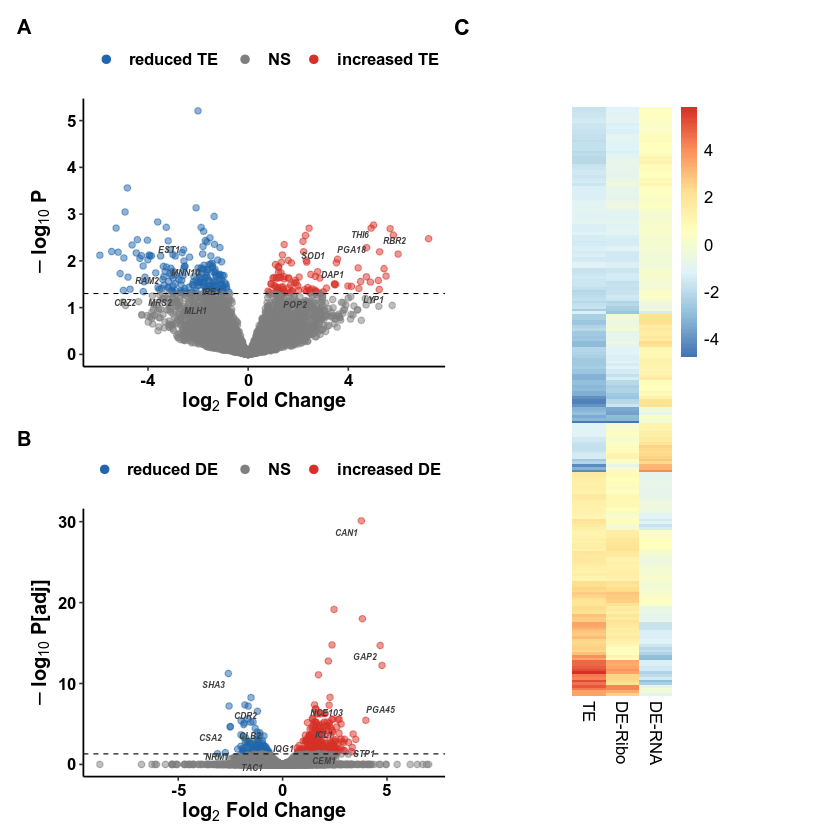

In [17]:
layout <- "AC
BC
"

p <- p1 + p2 + p3 + plot_layout(design = layout, tag_level =  'new')  + plot_annotation(tag_levels = 'A') &
    theme(plot.tag = element_text(face = 'bold'))
p

In [23]:
te.results[te.down.genes.highlight,]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,status,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CRZ2,138.7836,-4.188241,2.0920362,-2.001993,0.04528552,0.9997311,reduced TE,CRZ2
RAM2,414.7255,-3.212033,1.5466821,-2.076725,0.03782697,0.9997311,reduced TE,RAM2
MRS2,439.6350,-2.707122,1.3710180,-1.974534,0.04832104,0.9997311,reduced TE,MRS2
MLH1,314.9227,-2.697053,1.3377854,-2.016058,0.04379394,0.9997311,reduced TE,MLH1
EST1,524.1654,-2.566350,0.9977023,-2.572260,0.01010369,0.9997311,reduced TE,EST1
MNN10,604.0120,-2.227533,1.0394493,-2.142993,0.03211364,0.9997311,reduced TE,MNN10
IRE1,1756.2657,-2.190859,1.0289516,-2.129215,0.03323649,0.9997311,reduced TE,IRE1


In [22]:
te.results["MLH1",]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,status,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
MLH1,314.9227,-2.697053,1.337785,-2.016058,0.04379394,0.9997311,reduced TE,MLH1


In [18]:
ggsave(filename = "../Draft_Figures/Figure2_Draft.pdf", plot = p, width = 8, height=8)